In [29]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

# Análisis de componentes principales

En esta sesión práctica veremos como llevar a cabo un Análisis de Componentes Principales con R. El análisis
de componentes principales se concibe como una técnica de reducción de la dimensión, pues permite pasar de
una gran cantidad de variables interrelacionadas a unas pocas componentes principales. El método consiste
en buscar combinaciones lineales de las variables originales que representen lo mejor posible a la variabilidad
presente en los datos. De este modo, con unas pocas combinaciones lineales, que serán las componentes
principales, sería suficiente para entender la información contenida en los datos. Al mismo tiempo, la forma
en que se construyen las componentes, y su relación con unas u otras variables originales, sirven para entender
la estructura de correlación inherente a los datos. Por último, las componentes principales, que forman un
vector aleatorio de dimensión menor, pueden ser empleadas en análisis estadísticos posteriores, como por
ejemplo en regresión.

## Análisis de componentes principales con `princomp`

Trabajaremos a lo largo de este laboratorio con el siguiente ejemplo. Se ha examinado a 25 alumnos, aspirantes
a ingresar en el Máster Interuniversitario en Big Data, de 5 materias diferentes: Programación (cuyo resultado
se almacena en la variable `prog`), Ingeniería de Computadores (`ingcom`), Ingeniería del Software (`ingsof`),
Sistemas de la Información (`sist`) y Estadística (`estad`). Las puntuaciones obtenidas se encuentran en el
fichero 'aspirantes.txt' y se muestran a continuación.

In [30]:
dat <- read.table("Datos/aspirantes.txt", header = TRUE)
dat

prog,ingcom,ingsof,sist,estad
<int>,<int>,<int>,<int>,<int>
36,58,43,36,37
62,54,50,46,52
31,42,41,40,29
76,78,69,66,81
46,56,52,56,40
12,42,38,38,28
39,46,51,54,41
30,51,54,52,32
22,32,43,28,22


El objetivo de este estudio es obtener un ranking global de alumnos para la entrada en el máster, a través de
una puntuación global, extraída como cierta combinación lineal de las calificaciones en las cinco materias
examinadas.

Vamos a realizar entonces un Análisis de Componentes Principales con R. El comando básico de R que
ejecuta el análisis de componentes principales es `princomp`. También se pueden obtener resultados similares
con el comando `prcomp`. La diferencia principal entre uno y otro es que `princomp` diagonaliza la matriz S,
mientras que `prcomp` diagonaliza la matriz $S_c$. Esto modifica los autovalores en la proporción $n/(n − 1)$, pero
no supone ningún cambio en los autovectores. Hemos optado por el comando `princomp`. A continuación
se muestran las instrucciones que permiten realizar un análisis de componentes principales para el ejemplo,
utilizando R. En primer lugar, como salida del objeto se muestran las desviaciones típicas de las componentes,
que son las raíces cuadradas de los autovalores de S.

In [31]:
test.pca <- princomp(dat)
test.pca

Call:
princomp(x = dat)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
28.489680  9.035471  6.600955  6.133582  3.723358 

 5  variables and  25 observations.

Si hacemos un `summary` del objeto, obtenemos además la proporción de varianza explicada y sus valores acumulados

In [32]:
summary(test.pca)

Importance of components:
                           Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     28.4896795 9.03547104 6.60095491 6.13358179 3.72335754
Proportion of Variance  0.8212222 0.08260135 0.04408584 0.03806395 0.01402668
Cumulative Proportion   0.8212222 0.90382353 0.94790936 0.98597332 1.00000000

Además de esta información, el objeto `test.pca` almacena otra información relevante

In [33]:
names(test.pca)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

Como hemos visto, podemos obtener las desviaciones típicas de las componentes. De este modo, podemos obtener las varianzas de las componentes principales, que son los autovalores. 

In [34]:
test.pca$sdev
av <- test.pca$sdev**2
av

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
28.489680  9.035471  6.600955  6.133582  3.723358

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
811.66184  81.63974  43.57261  37.62083  13.86339

Recordamos que si extraemos una componente principal, obtenemos la variable aleatoria unidimensional
\begin{equation}
z_1 = v_1' x
\end{equation}

Si en lugar de recoger todo el vector aleatorio, solo aportamos $z_1$ reduciendo la información a una variable unidimensional, junto con la simplificación se produce una reducción de variabilidad, que pasa a ser 
\begin{equation}
\text{Var}(z_1) = \lambda_1
\end{equation}

In [35]:
av <- test.pca$sdev**2
av[1]/sum(av)
sum(av[1:2])/sum(av)

Comp.1 
0.8212222

[1] 0.9038235

Decimos que el cociente
\begin{equation}
\frac{\lambda_1}{\sum_{i = 1}^d \lambda_i}
\end{equation}

es la proporción de variabilidad explicada por la primera componente principal. 

In [36]:
# Las dos primeras componentes explican un 90% de la variabilidad
sum(av[1:2])/sum(av)

[1] 0.9038235

Si en lugar de una única componente principal extraemos $r$ componentes resulta que
\begin{equation}
\frac{\sum_{i = 1}^r \lambda_i}{\sum_{i = 1}^d \lambda_i}
\end{equation}

es la proporción de variabilidad explicada por las $r$ primeras componentes principales. 

Debemos decidir entre la simplificación que supone la reducción de la dimensión y la pérdida de información
resultante de la variabilidad no explicada. Como criterios para tomar esta decisión, se suelen emplear los
siguientes:
* Criterio de la varianza explicada. Consiste en retener el número de componentes que conjuntamente expliquen una proporción de varianza establecida, habitualmente un 90\% o 95\% del total.
* Gráfico de sedimentación (*screeplot*). Representar en un gráfico los valores propios $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d$ en orden decreciente, y buscar un “codo” en el gráfico, entendiendo por codo un punto a partir del cual los valores propios son claramente más pequeños que los anteriores, y muy similares entre sí.
* Retener un número preestablecido de componentes principales. Por ejemplo, es costumbre retener dos componentes, pues se pueden representar fácilmente en el plano.

Podemos hacer un gráfico de las varianzas de las componentes con `screeplot`.

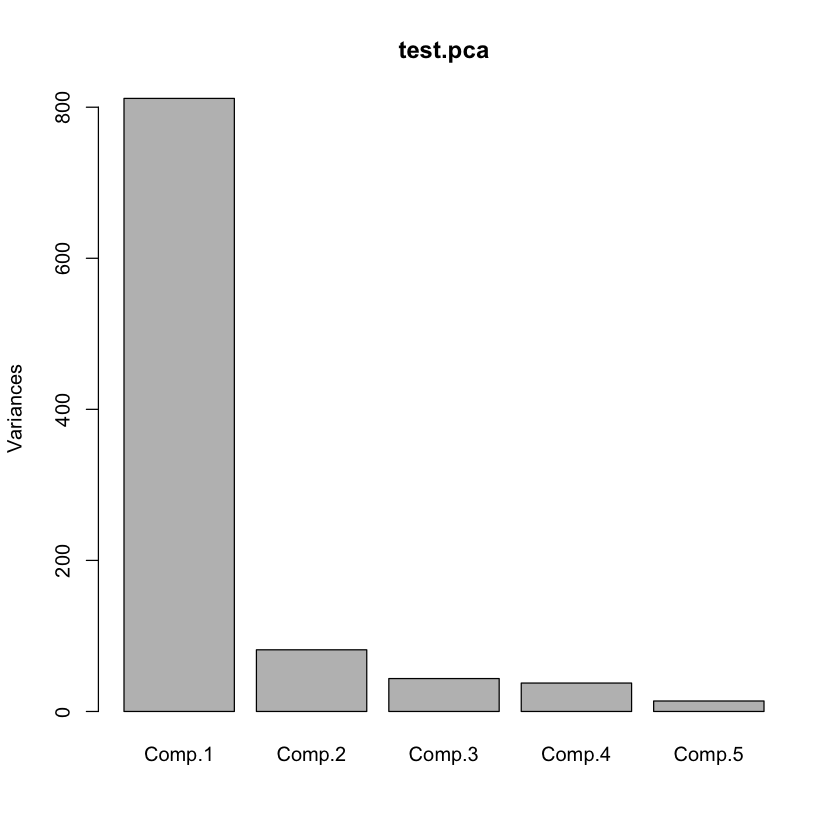

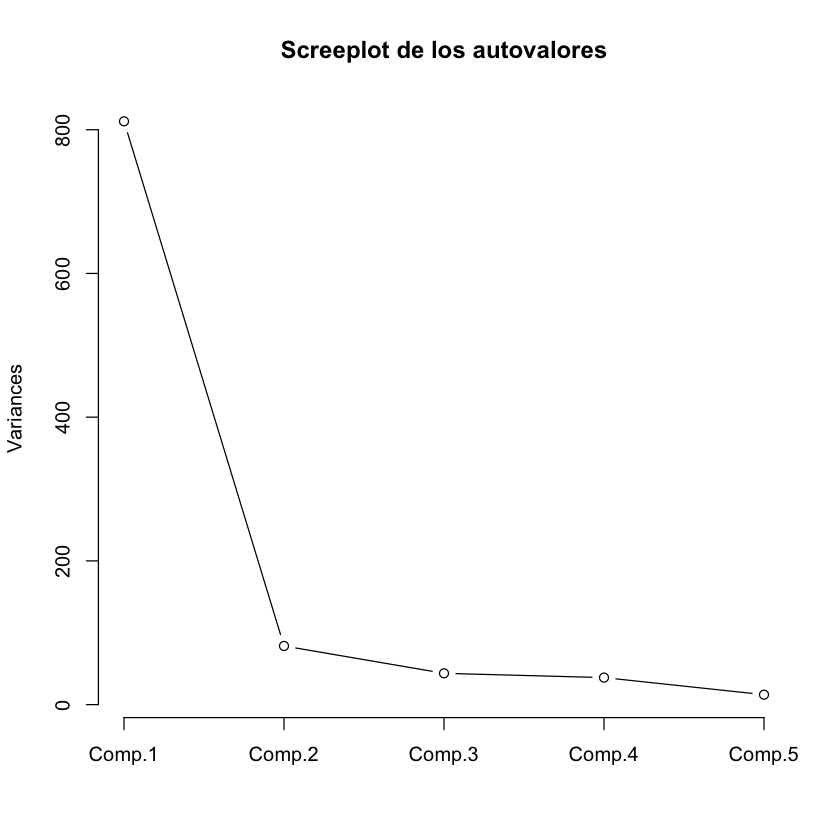

In [37]:
# reresentacion de los autovalores (grafico de sedimentacion)
screeplot(test.pca)
# mismo grafico con lineas
screeplot(test.pca, type = "lines", main="Screeplot de los autovalores")

Además, podemos obtener los autovectores asociados (columnas de la matriz `test.pca$loadings`)

In [38]:
test.pca$loadings


Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
prog    0.598  0.675  0.185  0.386       
ingcom  0.361  0.245 -0.249 -0.829 -0.247
ingsof  0.302 -0.214 -0.211 -0.135  0.894
sist    0.389 -0.338 -0.700  0.375 -0.321
estad   0.519 -0.570  0.607        -0.179

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

Observamos que la primera componente principal es la variable con máxima varianza y tiene todos sus
coeficientes positivos. Se puede interpretar como una componente de tamaño que determina la “calificación
general de los estudiantes”. La primera componente ordena a los estudiantes según su tamaño (calificación
general), del más pequeño al más grande. La segunda componente tiene coeficientes positivos y negativos
y se interpreta como una componente de *forma* que ordena a los estudiantes contrastando los buenos en
Programación e Ingeniería de Computadores frente a los buenos en el resto de materias.

Representamos los coeficientes de las componentes principales mediante el siguiente gráfico.

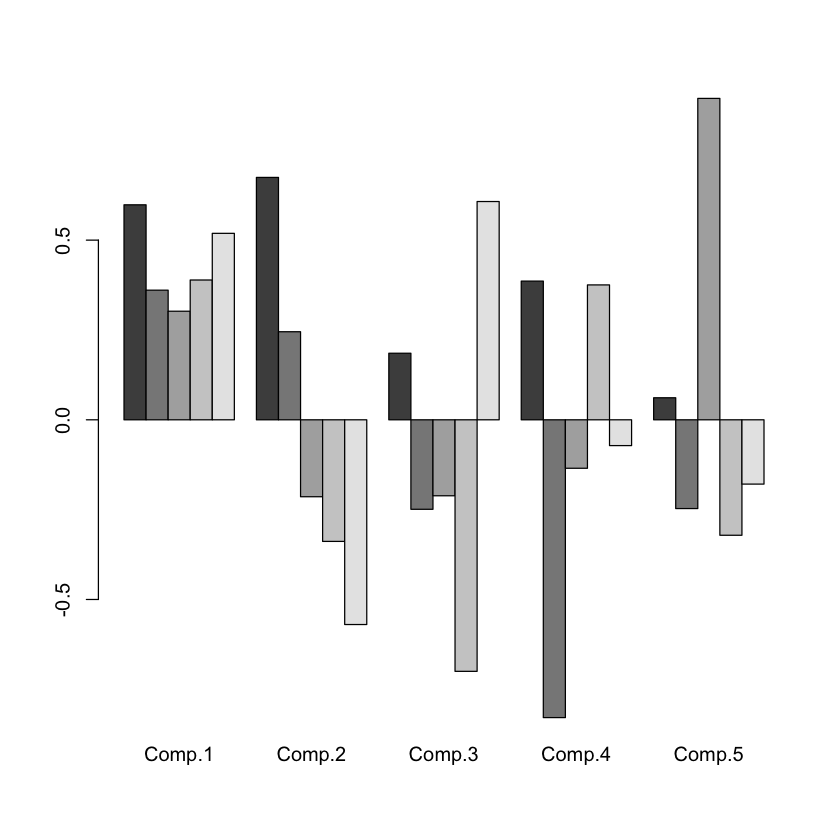

In [39]:
barplot(loadings(test.pca), beside = TRUE)

Podemos obtener también el número de observaciones, el vector de medias y los escalados aplicados a cada variable

In [40]:
test.pca$n.obs

[1] 25

In [41]:
test.pca$center

prog ingcom ingsof   sist  estad 
 36.76  50.60  50.68  46.04  43.80

In [42]:
test.pca$scale

prog ingcom ingsof   sist  estad 
     1      1      1      1      1

Por último, obtenemos los `scores`, que son el resultado de $XP$, siendo $P$ la matriz que tiene como columnas los autovectores de $S$. 

In [43]:
test.pca$scores

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-7.5403215,10.2167650,2.5374713,-8.6708997,-4.3011164
20.3610372,13.3460340,8.9820585,6.4124949,-1.3548711
-19.5031539,6.5552439,-1.6414327,5.0042015,-2.2980498
65.9652730,1.3136646,5.1988159,-5.2093505,-1.0457668
9.7780565,6.0680143,-9.1921582,2.9249303,-2.1069944
-33.0739529,-4.3722312,-3.7345190,-2.6038323,-5.3246839
1.4212177,-0.7833317,-5.7800406,7.8225646,-0.4967347
-6.7011638,-0.4667798,-13.3936497,-0.3040531,2.6525120
-36.1916160,5.6543609,2.9062814,5.5458471,6.5171961
-38.0586178,-3.8266815,-2.5248244,-6.0338259,6.3212284


## Análisis de componentes principales a través de la descomposición espectral de la matriz de covarianza

Comprobamos que, efectivamente, los resultados proporcionados por la función `princomp` coinciden con los obtenidos a partir de la descomposición espectral de la matriz de covarianzas. En primer lugar, calculamos el número de observaciones y el vector de medias.

In [44]:
n <- nrow(dat)
apply(dat, 2, mean)

prog ingcom ingsof   sist  estad 
 36.76  50.60  50.68  46.04  43.80

A continuacion, calculamos la matriz de covarianzas muestral, sus autovalores y autovectores y comprobamos que coinciden con los resultados de `test.pca$sdev**2` y `test.pca$loadings`

In [45]:
S <- cov(dat) * (n - 1) / n  # divide entre n-1 asi que multiplicamos por n-1/n
auto <- eigen(S)  # mismo que antes pero en negativo (porque es la matriz de covarianzas) 
lambda <- auto$values
lambda

[1] 811.66184  81.63974  43.57261  37.62083  13.86339

In [46]:
v <- auto$vectors
v

-0.5982782,0.6745404,0.1852556,-0.38597894,0.06131111
-0.3607532,0.2450733,-0.2490064,0.82871854,-0.24701742
-0.3021774,-0.2140882,-0.2114109,0.13484564,0.89441442
-0.3890403,-0.3384022,-0.6999921,-0.37537871,-0.32129949
-0.5188995,-0.5697232,0.6074477,0.07178665,-0.17892129


A continuación, calculamos la proporción de varianza explicada y sus valores acumulados

In [47]:
lambda / sum(lambda)

[1] 0.82122218 0.08260135 0.04408584 0.03806395 0.01402668

In [48]:
cumsum(lambda / sum(lambda))

[1] 0.8212222 0.9038235 0.9479094 0.9859733 1.0000000

## Biplot

El biplot es una representación gráfica simultánea de los individuos (mediante puntos) y las variables
(mediante flechas), en un mismo sistema de coordenadas bidimensional construido en base a las dos primeras
componentes principales. Permite interpretar el significado de las componentes (la primera en el eje horizontal y la segunda en el eje vertical) en base a las direcciones de las flechas. A su vez, se valoran como parecidos los individuos cuyos puntos están próximos en el biplot. De igual modo tendrán correlación positiva las variables con flechas semejantes. Asimismo, los individuos que se encuentran en la dirección de cierta flecha tendrán observaciones altas en la variable representada por la flecha.

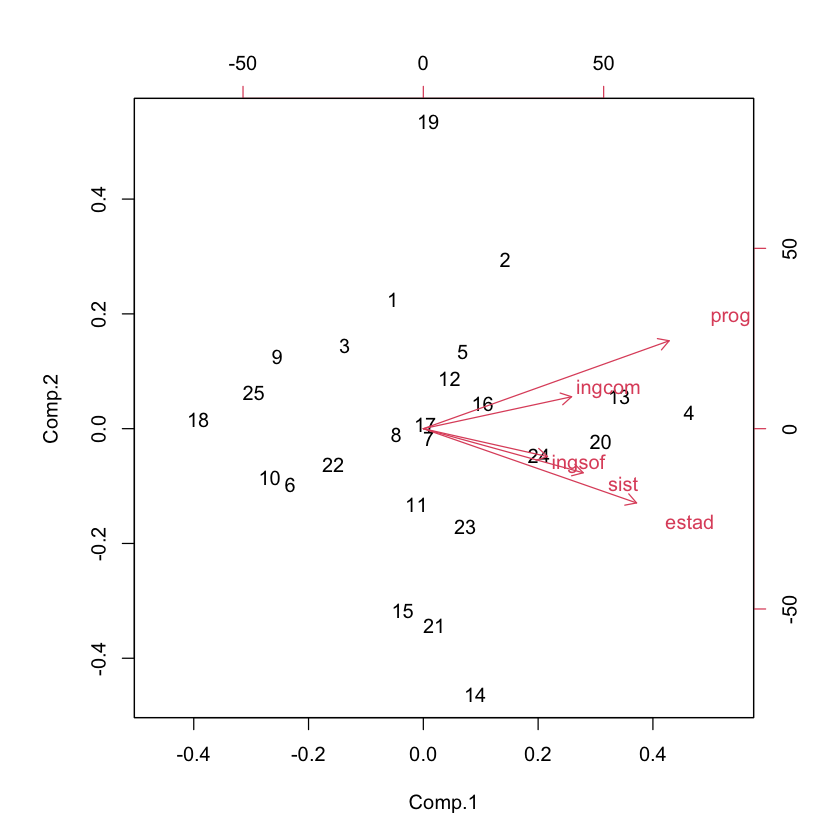

In [49]:
biplot(test.pca)

## Las componentes principales y los cambios de escala

Un problema importante del análisis de componentes principales es que sus resultados dependen de la escala
de medida de las variables originales. Así, si se cambia de escala una variable (dejando las demás fijas) las
componentes principales se modifican, cambiando incluso la posible interpretación de las mismas. En concreto,
si se aumenta la escala de una variable, ésta verá incrementada su varianza y su aportación proporcional a la varianza total, atrayendo de este modo a la primera componente principal, que se asemejará a esta variable.

Claro está que si se realiza el mismo cambio de escala en todas las variables, entonces los resultados del
análisis de componentes principales se mantendrán idénticos.

Este problema se puede solventar de dos maneras:

* Midiendo todas las variables en la misma escala (siempre que sean de la misma naturaleza).
* Aplicando el análisis de componentes principales a las variables estandarizadas. Esto último equivale a trabajar con la matriz de correlaciones, en lugar de la matriz de covarianzas.

El archivo 'decatlon.txt' contiene los resultados de 33 participantes en la prueba combinada de atletismo
durante una competición. Las filas corresponden a los participantes y las columnas a los resultados en las diez
pruebas (cuatro carreras, tres lanzamientos y tres saltos). Las variables correspondientes son: 100 metros
(`X100`), salto de longitud (`long`), lanzamiento de peso (`poid`), salto de altura (`haut`), 400 metros (`X400`),110 metros vallas (`X110`), lanzamiento de disco (`disq`), salto con pértiga (`perc`), lanzamiento de jabalina (`jave`) y 1500 metros (`X1500`).
1. Realiza un Análisis de Componentes Principales con los datos de decatlón. Justifica el uso de la matriz de covarianzas o de la matriz de correlaciones muestrales para llevar a cabo el análisis.
2. Haz una interpretación de las dos primeras componentes principales. ¿Cuál es la proporción de variabilidad explicada por las dos primeras componentes principales?
3. Realiza el biplot correspondiente y comenta la gráfica obtenida.

In [50]:
datos_decatlon <- read.table("Datos/decatlon.txt", header = TRUE)
head(datos_decatlon)

,X100,long,poid,haut,X400,X110,disq,perc,jave,X1500
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.25,7.43,15.48,2.27,48.90,15.13,49.28,4.7,61.32,268.95
2,10.87,7.45,14.97,1.97,47.71,14.46,44.36,5.1,61.76,273.02
3,11.18,7.44,14.20,1.97,48.29,14.81,43.66,5.2,64.16,263.20
4,10.62,7.38,15.02,2.03,49.06,14.72,44.80,4.9,64.04,285.11
5,11.02,7.43,12.92,1.97,47.44,14.40,41.20,5.2,57.46,256.64
6,10.83,7.72,13.58,2.12,48.34,14.18,43.06,4.9,52.18,274.07


In [51]:
summary(datos_decatlon)

      X100            long            poid            haut      
 Min.   :10.62   Min.   :6.220   Min.   :10.27   Min.   :1.790  
 1st Qu.:11.02   1st Qu.:7.000   1st Qu.:13.15   1st Qu.:1.940  
 Median :11.18   Median :7.090   Median :14.12   Median :1.970  
 Mean   :11.20   Mean   :7.133   Mean   :13.98   Mean   :1.983  
 3rd Qu.:11.43   3rd Qu.:7.370   3rd Qu.:14.97   3rd Qu.:2.030  
 Max.   :11.57   Max.   :7.720   Max.   :16.60   Max.   :2.270  
      X400            X110            disq            perc      
 Min.   :47.44   Min.   :14.18   Min.   :34.36   Min.   :4.000  
 1st Qu.:48.34   1st Qu.:14.72   1st Qu.:39.08   1st Qu.:4.600  
 Median :49.15   Median :15.00   Median :42.32   Median :4.700  
 Mean   :49.28   Mean   :15.05   Mean   :42.35   Mean   :4.739  
 3rd Qu.:49.98   3rd Qu.:15.38   3rd Qu.:44.80   3rd Qu.:4.900  
 Max.   :51.28   Max.   :16.20   Max.   :50.66   Max.   :5.700  
      jave           X1500      
 Min.   :49.52   Min.   :256.6  
 1st Qu.:55.42   1st Qu.

En un Análisis de Componentes Principales (PCA), la elección entre usar la matriz de covarianzas o la matriz de correlaciones muestrales depende de las características de los datos:

* Matriz de Covarianzas:
    * Es adecuada cuando las variables están en la misma escala o tienen unidades comparables.
    * Se utiliza cuando las magnitudes de las variables son importantes y se desea preservar la varianza original de los datos.
* Matriz de Correlaciones Muestrales:
    * Es adecuada cuando las variables están en diferentes escalas o unidades.
    * Se utiliza cuando se desea estandarizar las variables para que todas tengan la misma importancia en el análisis, eliminando el efecto de las diferentes escalas.
    * Es útil cuando se quiere comparar la estructura de correlación entre las variables, independientemente de sus magnitudes.
    
En resumen, usa la matriz de covarianzas cuando las variables tienen escalas comparables y la matriz de correlaciones muestrales cuando las variables tienen diferentes escalas o unidades.

Comencemos viendo los resultados que hacen uso de la matriz de covarianzas:

In [52]:
pca_decatlon <- princomp(datos_decatlon)
summary(pca_decatlon)

Importance of components:
                           Comp.1    Comp.2    Comp.3      Comp.4      Comp.5
Standard deviation     13.5703138 5.7156823 2.9154554 0.926253946 0.687453789
Proportion of Variance  0.8115669 0.1439729 0.0374591 0.003780982 0.002082723
Cumulative Proportion   0.8115669 0.9555397 0.9929988 0.996779816 0.998862539
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.3412388755 0.2436593218 0.2279377697 0.1539025888
Proportion of Variance 0.0005131703 0.0002616439 0.0002289692 0.0001043846
Cumulative Proportion  0.9993757093 0.9996373532 0.9998663224 0.9999707070
                            Comp.10
Standard deviation     8.152850e-02
Proportion of Variance 2.929297e-05
Cumulative Proportion  1.000000e+00

In [53]:
pca_decatlon$loadings


Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
X100                        0.168         0.116  0.103  0.233  0.944        
long                       -0.136        -0.274        -0.908  0.280        
poid         -0.156 -0.205 -0.177 -0.887  0.323                             
haut                                     -0.110                      -0.993 
X400                        0.848 -0.332 -0.394                             
X110                        0.398  0.186  0.763  0.298 -0.334 -0.122        
disq   0.118 -0.352 -0.891  0.120  0.222                                    
perc                       -0.164 -0.107 -0.231  0.947                      
jave         -0.918  0.387                                                  
X1500  0.990                                                                

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings       1.0    1.0    1.0    1.0    1.0    1.0    1.0

Hay un problema claro en la unidad de medida, no todas usan la misma escala. En este caso, lo adecuado es usar la matriz de correlación muestral para normalizar los datos. Esto se puede hacer fijando `cor = TRUE`

In [54]:
pca_decatlon_muestral <- princomp(datos_decatlon, cor=TRUE)
summary(pca_decatlon_muestral)

# Usando princomp con cor=TRUE, que estandariza las variables
#pca1 <- princomp(datos_decatlon, cor=TRUE)

# O escalando primero y luego aplicando princomp
#datos_escalados <- scale(datos_decatlon)
#pca2 <- princomp(datos_escalados)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.8488478 1.6144328 0.97123448 0.93702788 0.74607416
Proportion of Variance 0.3418238 0.2606393 0.09432964 0.08780212 0.05566267
Cumulative Proportion  0.3418238 0.6024631 0.69679277 0.78459489 0.84025756
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.70087625 0.65619754 0.55389360 0.51667148 0.31914597
Proportion of Variance 0.04912275 0.04305952 0.03067981 0.02669494 0.01018542
Cumulative Proportion  0.88938031 0.93243983 0.96311964 0.98981458 1.00000000

In [55]:
# Verificar la proporción de varianza explicada por cada componente
prop_var <- pca_model$sdev^2 / sum(pca_model$sdev^2)

ERROR: Error in eval(expr, envir, enclos): objeto 'pca_model' no encontrado


In [ ]:
# Graficar la proporción de varianza explicada acumulativa
cumulative_prop_var <- cumsum(prop_var)
plot(cumulative_prop_var, type = "b", xlab = "Número de Componentes", ylab = "Proporción de Varianza Explicada Acumulativa")

ERROR: Error in eval(expr, envir, enclos): objeto 'prop_var' no encontrado


In [56]:
# Seleccionar el número de componentes principales deseado
num_components <- 5  # Puedes ajustar este valor según tus necesidades

# Reducir dimensionalidad con PCA
reduced_X_train_pca <- predict(pca_model, newdata = scaled_X_train)[, 1:num_components]

# Aplicar la misma reducción a los datos de prueba
scaled_X_test <- scale(X_test)
reduced_X_test_pca <- predict(pca_model, newdata = scaled_X_test)[, 1:num_components]


ERROR: Error in eval(expr, envir, enclos): objeto 'pca_model' no encontrado


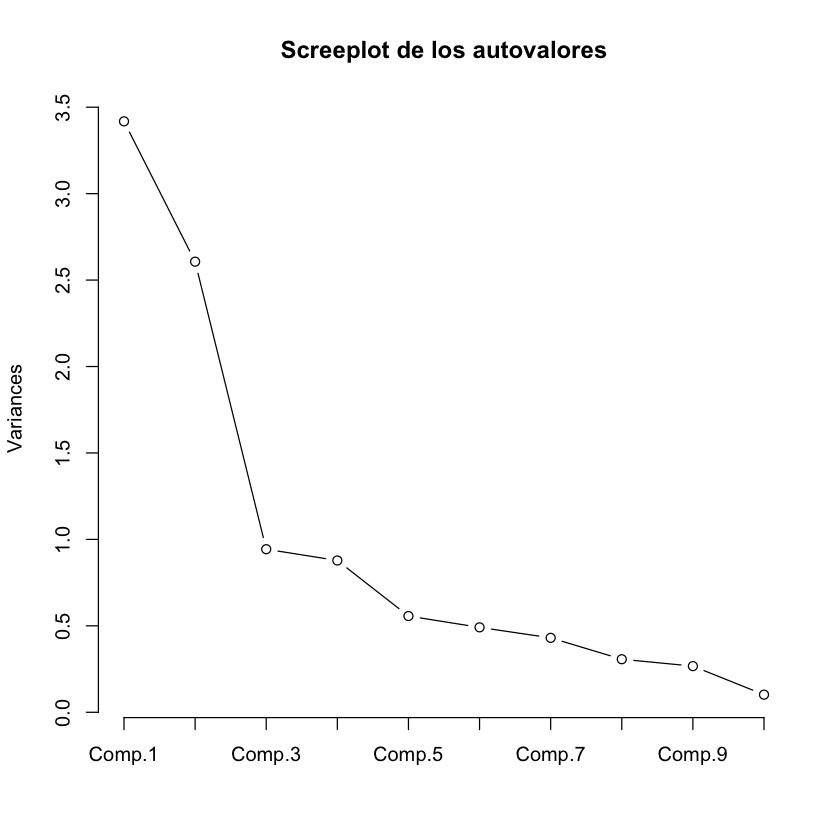

In [57]:
screeplot(pca_decatlon_muestral, type="lines", main="Screeplot de los autovalores") 

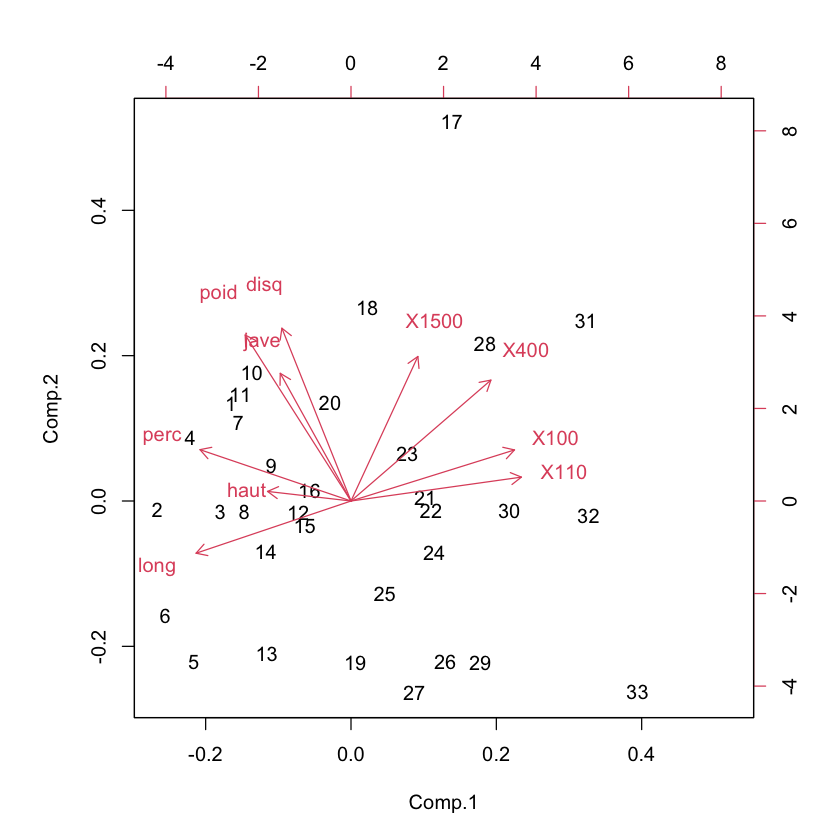

In [58]:
biplot(pca_decatlon_muestral) # aqui deberia quedarme con 2

Ahora, en la primera componente principal entran todas la variables

In [59]:
pca_decatlon_muestral$loading


Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
X100   0.416  0.149  0.267         0.442         0.254  0.664  0.108  0.109 
long  -0.394 -0.152  0.169  0.244 -0.369         0.751  0.141               
poid  -0.269  0.484         0.108         0.230 -0.111        -0.422  0.651 
haut  -0.212         0.855 -0.388               -0.135 -0.155  0.102  0.119 
X400   0.356  0.352  0.189        -0.147 -0.327  0.141 -0.147 -0.651 -0.337 
X110   0.433         0.126  0.382         0.210  0.273 -0.639  0.207  0.260 
disq  -0.176  0.503                       0.615  0.144         0.167 -0.535 
perc  -0.384  0.150 -0.137 -0.144  0.717 -0.348  0.273 -0.277               
jave  -0.180  0.372  0.192  0.600        -0.437 -0.342         0.306 -0.131 
X1500  0.170  0.421 -0.223 -0.486 -0.340 -0.300  0.187         0.457  0.243 

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings       1.0    1.0    1.0    1.0    1.0    1.0    1.0

La Primera Componente Principal contrasta principalmente las disciplinas de velocidad y resistencia (carreras de 100 metros, 400 metros y 110 metros vallas) con las disciplinas de salto y lanzamiento (salto de longitud, salto con pértiga, lanzamiento de peso, lanzamiento de disco y lanzamiento de jabalina).

Cargas positivas altas indican que los atletas que obtienen buenos resultados en las carreras tienden a tener puntuaciones altas en esta componente.
Cargas negativas altas sugieren que aquellos que sobresalen en las disciplinas de salto y lanzamiento tienen puntuaciones bajas en esta componente.
Por lo tanto, Comp.1 puede interpretarse como una dimensión que distingue a los atletas según su rendimiento en pruebas de velocidad/resistencia frente a pruebas de salto/lanzamiento

## Regresión de componentes principales

Cargamos un conjunto de datos de 215 muestras de carne picada. Para cada muestra, se tiene el contenido de grasa, `fat` junto con el espectro de canal de 100 absorbancias, `V1`, `V2`, ..., `V100`. Es decir, tenemos el contenido de grasa en función de 100 variables.

In [60]:
if(!require(faraway)) install.packages("faraway")
library(faraway)
data(meatspec)
head(meatspec)

Cargando paquete requerido: faraway



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5
6,3.00993,3.01540,3.02086,3.02634,3.03190,3.03756,3.04341,3.04955,3.05599,3.06274,...,3.55877,3.54651,3.53442,3.52221,3.50972,3.49682,3.48325,3.46870,3.45307,42.7


En este caso estamos ante un problema de gran dimensión

In [61]:
dim(meatspec)

[1] 215 101

Dividimos la muestra en un conjunto de entrenamiento y otro de *test*

In [62]:
train= meatspec[1:172,]
cat("Dimensión del conjunto de entrenamiento: ", dim(train), "\n")
test= meatspec[173:215,]
cat("Dimensión del conjunto de entrenamiento: ", dim(test))

Dimensión del conjunto de entrenamiento:  172 101 
Dimensión del conjunto de entrenamiento:  43 101

Al tener un número $p$ de predictores tan grande, la regresión lineal clásica con `lm` no funcionará de forma adecuada

In [63]:
modelo1 <- lm(fat ~ ., data=train)
summary(modelo1)


Call:
lm(formula = fat ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09837 -0.35779  0.04555  0.38080  2.33860 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.324      2.012   3.143 0.002439 ** 
V1           12134.077   3659.798   3.316 0.001443 ** 
V2          -12585.857   5971.891  -2.108 0.038605 *  
V3           -5107.556   9390.265  -0.544 0.588200    
V4           23880.493  17143.644   1.393 0.167977    
V5          -40509.555  22129.359  -1.831 0.071360 .  
V6           28469.416  19569.400   1.455 0.150134    
V7          -20901.082  12501.639  -1.672 0.098952 .  
V8            8369.465   7515.467   1.114 0.269193    
V9           -1539.328   5397.505  -0.285 0.776327    
V10           4706.267   7406.895   0.635 0.527217    
V11           7012.943  11720.620   0.598 0.551516    
V12          14891.444  20169.170   0.738 0.462749    
V13         -30963.902  26186.839  -1.182 0.240983    
V14          

Veamos que tal ajusta esto. Si usamos el MSE como criterio de error

In [64]:
mean(modelo1$residuals^2) # MSE train 

[1] 0.4765372

Se tiene un valor muy bajo porque $p$ es del orden de $n$, estamos cerca de un poroblema de *overfitting*. Veamos con el conjunto de *test*

In [65]:
pred1 <- predict(modelo1, newdata = test)
mean((pred1 - test$fat)**2)

[1] 14.54659

Este problema se podría resolver con Ridge o Lasso, pero usaremos PCA. A continuación reducimos el número de características

Importance of components:
                          Comp.1     Comp.2      Comp.3      Comp.4
Standard deviation     5.0406702 0.50965678 0.280936190 0.167220963
Proportion of Variance 0.9856833 0.01007666 0.003061796 0.001084781
Cumulative Proportion  0.9856833 0.99575991 0.998821709 0.999906491
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     3.805410e-02 2.450229e-02 1.427535e-02 1.076746e-02
Proportion of Variance 5.617766e-05 2.329025e-05 7.905589e-06 4.497665e-06
Cumulative Proportion  9.999627e-01 9.999860e-01 9.999939e-01 9.999984e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     4.519595e-03 3.421886e-03 2.092611e-03 1.753515e-03
Proportion of Variance 7.924282e-07 4.542469e-07 1.698782e-07 1.192833e-07
Cumulative Proportion  9.999992e-01 9.999996e-01 9.999998e-01 9.999999e-01
                            Comp.13      Comp.14      Comp.15      Comp.16
Standard deviation     9.95

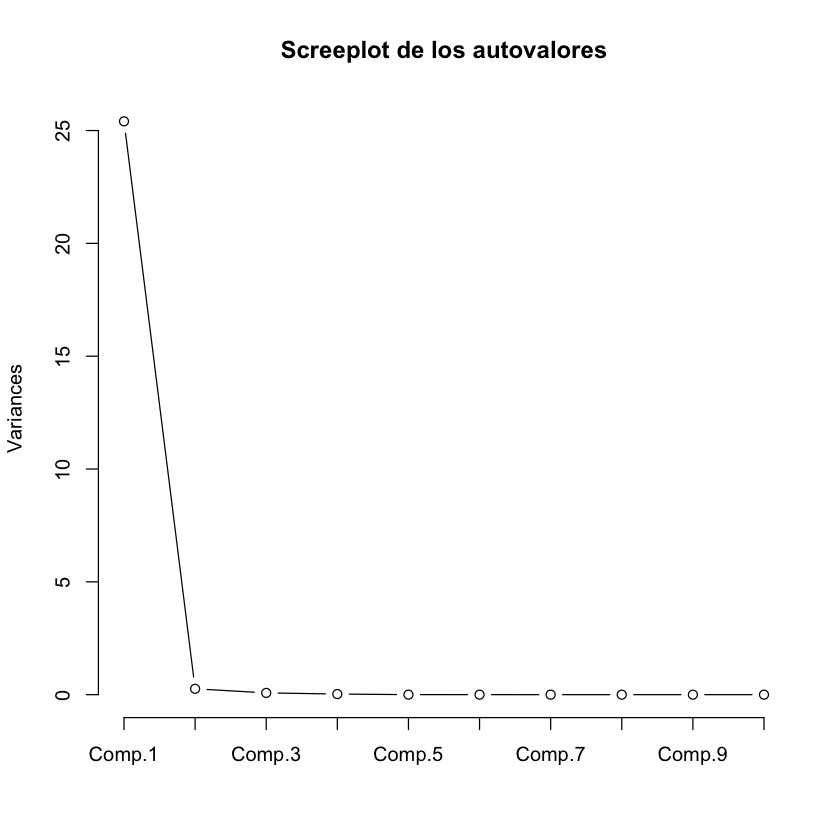

In [66]:
train_vars <- train[, 1:100] # nos quedamos con todas las carcateristicas (100), y quitamos fat 
pca_train <- princomp(train_vars) # la variabilidad es la misma asi que no usamos cor=TRUE
summary(pca_train)
screeplot(pca_train, type="lines", main="Screeplot de los autovalores")

Vemos que se puede prescindir de un gran número de dimensiones. Usamos entonces un numero pequeño de componentes principales, por ejemplo 4:

In [67]:
num_componentes <- 4
head(pca_train$scores[, 1:num_componentes]) # para cada individuo, cual es el valor de c/u de las componentes principales

# valores del input una vez proyectados sobre las 4 componentes principales

,Comp.1,Comp.2,Comp.3,Comp.4
1,-2.2445444,-0.2216308,-0.10548430,0.042954038
2,0.4415824,0.3120856,-0.63344048,-0.025670967
3,-3.8305205,0.6705955,0.12088701,-0.104286449
4,-1.0845207,0.5214110,0.30353775,0.028880391
5,0.5382648,-0.5896383,-0.07649802,0.009048980
6,2.8074461,0.1999868,-0.66350471,0.008467464


Ahora, usamos esto como *input* del entrenamiento proyectado. Construimos de nuevo el conjunto de entrenamiento:

In [68]:
train_vars_pred <- pca_train$scores[, 1:num_componentes]
#input del train proyectado y el output
# mezclamos en un dataframe el input proyectado y el output
train_pred <- as.data.frame(cbind(train_vars_pred, train$fat))

El entrenamiento proyectado es el valor de $Z_1, Z_2, Z_3, Z_4$ y el *output*. Ahora que hemos reducido la dimensión, probamos a hacer una regresión lineal proyectada 

In [69]:
names(train_pred)[num_componentes + 1] <- "fat"  # cambiamos el nombre de V5 a fat
modelo2 <- lm(fat ~ ., data = train_pred) 
summary(modelo2)


Call:
lm(formula = fat ~ ., data = train_pred)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4646  -2.7601   0.5251   2.8479   9.7824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.0930     0.3145  57.522  < 2e-16 ***
Comp.1        1.1987     0.0624  19.210  < 2e-16 ***
Comp.2       -3.3870     0.6172  -5.488 1.49e-07 ***
Comp.3      -27.0937     1.1196 -24.199  < 2e-16 ***
Comp.4      -40.5339     1.8810 -21.549  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.125 on 167 degrees of freedom
Multiple R-squared:  0.8967,	Adjusted R-squared:  0.8942 
F-statistic: 362.3 on 4 and 167 DF,  p-value: < 2.2e-16


In [70]:
mean(modelo2$residuals^2) # MSE train

[1] 16.52215

Primero proyectamos el el entrenamiento para entrenar el modelo. Luego con esos pesos proyetamos a *test*. Hay que varlo más como un conjunto de proyección.

In [71]:
# MSE test
test_vars_pred <- predict(pca_train, newdata = test[, 1:100]) # proyectamos el test
test_vars_pred <- as.data.frame(test_vars_pred[, 1:num_componentes]) # cuanto vale la proyeccion de cada individuo en cada componente principal

# prediccion del input test proyectado
yhat <- predict(modelo2, newdata = test_vars_pred)

# MSE test
mean((yhat - test$fat)**2)

[1] 20.55699

La reducción de dimensionalidad mediante PCA para luego aplicar regresión lineal es una buena técnica que permite abordar problemas de gran dimensionalidad en su forma original. Sin embargo, se pierde interpretabilidad, ya que estamos ajustando un modelo de la forma 
\begin{equation}
Y = \hat{\beta_0} + \hat{\beta}_1 Z_1 + \cdots + \hat{\beta}_l Z_l
\end{equation}

donde $Z_i$ son las componentes principales que se tomen.

## PCA sobre una imagen

También es posible aplicar un análisis de componentes principales sobre una imagen.

In [72]:
library(magick)
imag <- image_read('Datos/perro.jpg')

Linking to ImageMagick 6.9.12.93
Enabled features: cairo, fontconfig, freetype, heic, lcms, pango, raw, rsvg, webp
Disabled features: fftw, ghostscript, x11



Convertimos la imagen a blanco y negro

In [73]:
imag2 <- imag %>% image_quantize(colorspace = 'gray')

Convertimos la información de la imagen a una matriz

In [74]:
matima <- imag2[[1]]
dimima <- dim(matima)[2:3]
matima <- (matima[1,,])
matima <- matrix(as.double(matima),nrow=dimima[2])
matima <- matima[,dimima[1]:1]

Vemos como era la imagen original

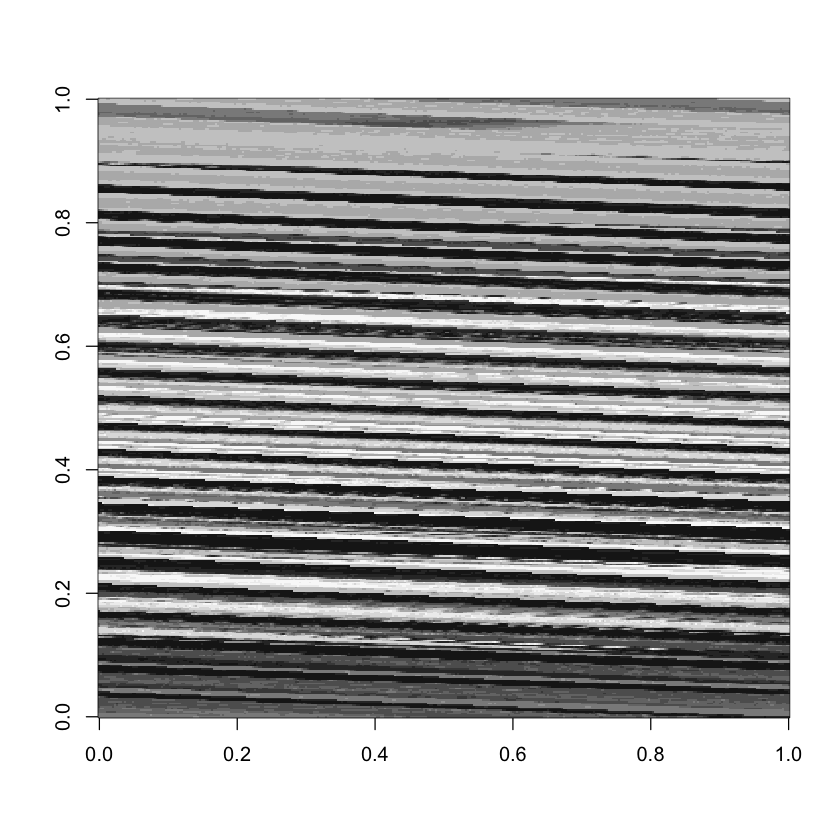

In [75]:
image(matima, col = hcl.colors(12, "Gray", rev = F))

Aplicamos componentes principales

In [76]:
pca <- princomp(t(matima))

# Variabilidad explicada (Autovalores)
av <- pca$sdev^2
cumsum(av)/sum(av)

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
0.2729992 0.5164568 0.6575610 0.7475190 0.8249277 0.8424698 0.8589873 0.8750597 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
0.8894630 0.9013206 0.9118020 0.9203766 0.9283156 0.9340185 0.9386559 0.9428734 
  Comp.17   Comp.18   Comp.19   Comp.20   Comp.21   Comp.22   Comp.23   Comp.24 
0.9466003 0.9500550 0.9530017 0.9554721 0.9578715 0.9601464 0.9623379 0.9643506 
  Comp.25   Comp.26   Comp.27   Comp.28   Comp.29   Comp.30   Comp.31   Comp.32 
0.9661543 0.9677700 0.9692300 0.9706135 0.9719850 0.9732858 0.9745292 0.9755220 
  Comp.33   Comp.34   Comp.35   Comp.36   Comp.37   Comp.38   Comp.39   Comp.40 
0.9764345 0.9773236 0.9781608 0.9789914 0.9797668 0.9805102 0.9812299 0.9818837 
  Comp.41   Comp.42   Comp.43   Comp.44   Comp.45   Comp.46   Comp.47   Comp.48 
0.9825008 0.9831010 0.9836639 0.9842158 0.9847484 0.9852568 0.9857154 0.9861581 
  Comp.49   Comp.50   Comp.51   Comp.52   Comp.53   Comp.54   Comp.55   Comp.56 
0.9865889 0.9870038 0.9873902 0.9877718 0.9881297 0.9884822 0.9888272 0.9891583 
  Comp.57   Comp.58   Comp.59   Comp.60   Comp.61   Comp.62   Comp.63   Comp.64 
0.9894763 0.9897697 0.9900610 0.9903300 0.9905877 0.9908446 0.9910953 0.9913248 
  Comp.65   Comp.66   Comp.67   Comp.68   Comp.69   Comp.70   Comp.71   Comp.72 
0.9915482 0.9917574 0.9919586 0.9921551 0.9923484 0.9925355 0.9927071 0.9928770 
  Comp.73   Comp.74   Comp.75   Comp.76   Comp.77   Comp.78   Comp.79   Comp.80 
0.9930406 0.9931944 0.9933462 0.9934942 0.9936365 0.9937745 0.9939066 0.9940374 
  Comp.81   Comp.82   Comp.83   Comp.84   Comp.85   Comp.86   Comp.87   Comp.88 
0.9941631 0.9942838 0.9944010 0.9945174 0.9946302 0.9947425 0.9948503 0.9949552 
  Comp.89   Comp.90   Comp.91   Comp.92   Comp.93   Comp.94   Comp.95   Comp.96 
0.9950583 0.9951583 0.9952576 0.9953523 0.9954468 0.9955382 0.9956290 0.9957173 
  Comp.97   Comp.98   Comp.99  Comp.100  Comp.101  Comp.102  Comp.103  Comp.104 
0.9958042 0.9958885 0.9959709 0.9960519 0.9961303 0.9962079 0.9962843 0.9963589 
 Comp.105  Comp.106  Comp.107  Comp.108  Comp.109  Comp.110  Comp.111  Comp.112 
0.9964318 0.9965022 0.9965700 0.9966362 0.9966994 0.9967609 0.9968219 0.9968819 
 Comp.113  Comp.114  Comp.115  Comp.116  Comp.117  Comp.118  Comp.119  Comp.120 
0.9969411 0.9969978 0.9970539 0.9971096 0.9971647 0.9972179 0.9972703 0.9973203 
 Comp.121  Comp.122  Comp.123  Comp.124  Comp.125  Comp.126  Comp.127  Comp.128 
0.9973698 0.9974187 0.9974669 0.9975144 0.9975608 0.9976064 0.9976514 0.9976949 
 Comp.129  Comp.130  Comp.131  Comp.132  Comp.133  Comp.134  Comp.135  Comp.136 
0.9977380 0.9977797 0.9978209 0.9978612 0.9979006 0.9979393 0.9979775 0.9980148 
 Comp.137  Comp.138  Comp.139  Comp.140  Comp.141  Comp.142  Comp.143  Comp.144 
0.9980516 0.9980878 0.9981233 0.9981582 0.9981931 0.9982265 0.9982593 0.9982913 
 Comp.145  Comp.146  Comp.147  Comp.148  Comp.149  Comp.150  Comp.151  Comp.152 
0.9983228 0.9983539 0.9983846 0.9984147 0.9984439 0.9984729 0.9985015 0.9985299 
 Comp.153  Comp.154  Comp.155  Comp.156  Comp.157  Comp.158  Comp.159  Comp.160 
0.9985577 0.9985852 0.9986126 0.9986393 0.9986652 0.9986909 0.9987161 0.9987410 
 Comp.161  Comp.162  Comp.163  Comp.164  Comp.165  Comp.166  Comp.167  Comp.168 
0.9987651 0.9987889 0.9988124 0.9988357 0.9988586 0.9988809 0.9989032 0.9989252 
 Comp.169  Comp.170  Comp.171  Comp.172  Comp.173  Comp.174  Comp.175  Comp.176 
0.9989465 0.9989674 0.9989881 0.9990086 0.9990285 0.9990480 0.9990671 0.9990861 
 Comp.177  Comp.178  Comp.179  Comp.180  Comp.181  Comp.182  Comp.183  Comp.184 
0.9991044 0.9991227 0.9991407 0.9991577 0.9991745 0.9991912 0.9992077 0.9992239 
 Comp.185  Comp.186  Comp.187  Comp.188  Comp.189  Comp.190  Comp.191  Comp.192 
0.9992399 0.9992559 0.9992714 0.9992867 0.9993017 0.9993164 0.9993309 0.9993452 
 Comp.193  Comp.194  Comp.195  Comp.196  Comp.197  Comp.198  Comp.199  Comp.200 
0.9993594 0.9993734 0.9993870 0.99

Nos quedamos solo con las primeras 25 componentes, a ver qué pasa

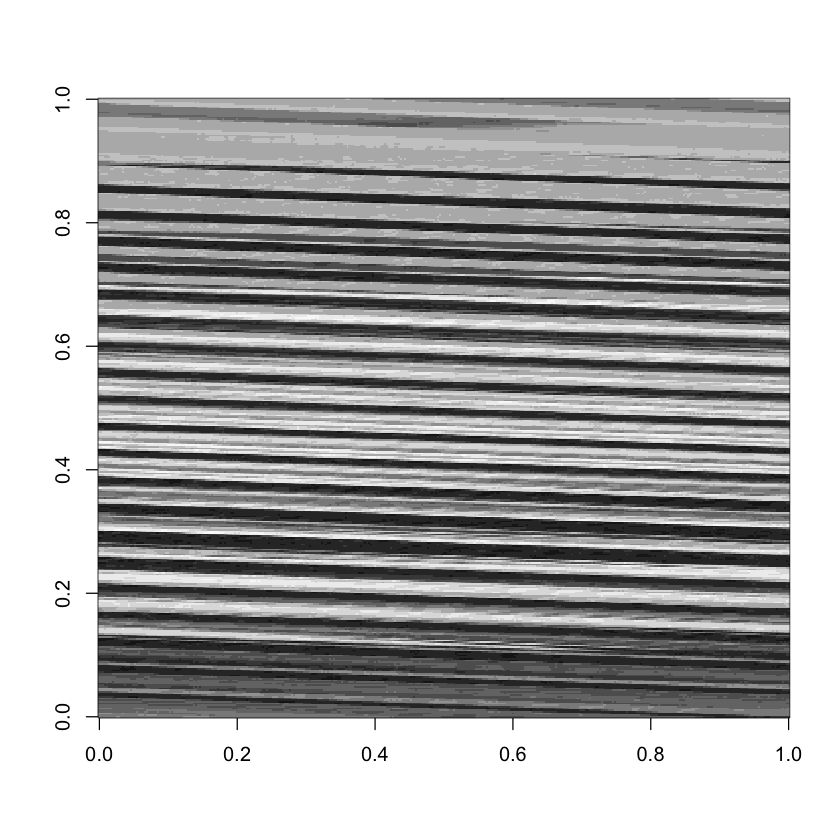

In [77]:
ncomp <- 25
newimage <- pca$loadings[,1:ncomp]%*%t(pca$scores)[1:ncomp,]
newimage <- newimage+ pca$center
image(newimage,col = hcl.colors(12, "Gray", rev = F))